# **Worked by,**

**Mishael Natth Viswanathan**

**Adam Abelkefi**

**Gustave DE PUIFFE**

**Ari Lepinay**

# **Uploading Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2025_Accidentalidad.csv to 2025_Accidentalidad (1).csv
Saving 300107-0-agenda-actividades-eventos.csv to 300107-0-agenda-actividades-eventos.csv
Saving ActuacionesBomberos_2025.csv to ActuacionesBomberos_2025.csv
Saving airbnb_reservations_madrid.csv to airbnb_reservations_madrid.csv
Saving bases_bicimad.csv to bases_bicimad.csv
Saving madrid_crime_dataset_2019_2022.csv to madrid_crime_dataset_2019_2022.csv
Saving MadridPolution2001-2022_SyntheticDistricts.csv to MadridPolution2001-2022_SyntheticDistricts.csv
Saving tourist_arrivals_madrid.csv to tourist_arrivals_madrid.csv
Saving weather_madrid_2019-2022.csv to weather_madrid_2019-2022.csv


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# 🚲 Hypothesis 1 : Air Pollution vs Bike Infrastructure in Madrid

## 1- Hypothesis
Bike infrastructure is more developed in districts with lower air pollution levels in Madrid.
We expect to see more BiciMAD stations and bike slots in areas where NO₂ and PM10 concentrations are lower, suggesting a planning preference for healthier environments.

## 2- Data Section
**Pollution Data:** `MadridPolution2001-2022_SyntheticDistricts.csv`

**Bike Station Data:** `bases_bicimad.csv`

**Merge Strategy:** Average pollution values grouped by district are merged with bike station counts.

In [ ]:
# pollution_df = pd.read_csv('/content/MadridPolution2001-2022_SyntheticDistricts.csv')
# bikes_df = pd.read_csv('/content/bases_bicimad.csv', sep=';', on_bad_lines='skip')

pollution_df = pd.read_csv('MadridPolution2001-2022_SyntheticDistricts.csv')
bikes_df = pd.read_csv('bases_bicimad.csv', sep=';', on_bad_lines='skip')


bikes_df['Distrito'] = (
    bikes_df['Distrito']
    .str.replace(r'^\d+\s+', '', regex=True)
    .str.replace('\xa0', '', regex=False)
    .str.strip()
    .str.capitalize()
)


pollution_by_district = pollution_df.groupby('DISTRITO').mean(numeric_only=True).reset_index()
stations_by_district = bikes_df.groupby('Distrito').agg({
    'Número': 'count',
    'Número de Plazas': 'sum'
}).reset_index().rename(columns={
    'Número': 'Number_of_Stations',
    'Número de Plazas': 'Total_Bike_Slots'
})


merged_df = pd.merge(stations_by_district, pollution_by_district, left_on='Distrito', right_on='DISTRITO', how='inner')



## 3- Data Science Section
**Visualizations:**
1. Number of stations per district
2. Average NO₂ per district
3. NO₂ vs number of stations (scatter)
4. Regression: pollution vs bike slots
5. Correlation heatmap

## 1.Stations per district

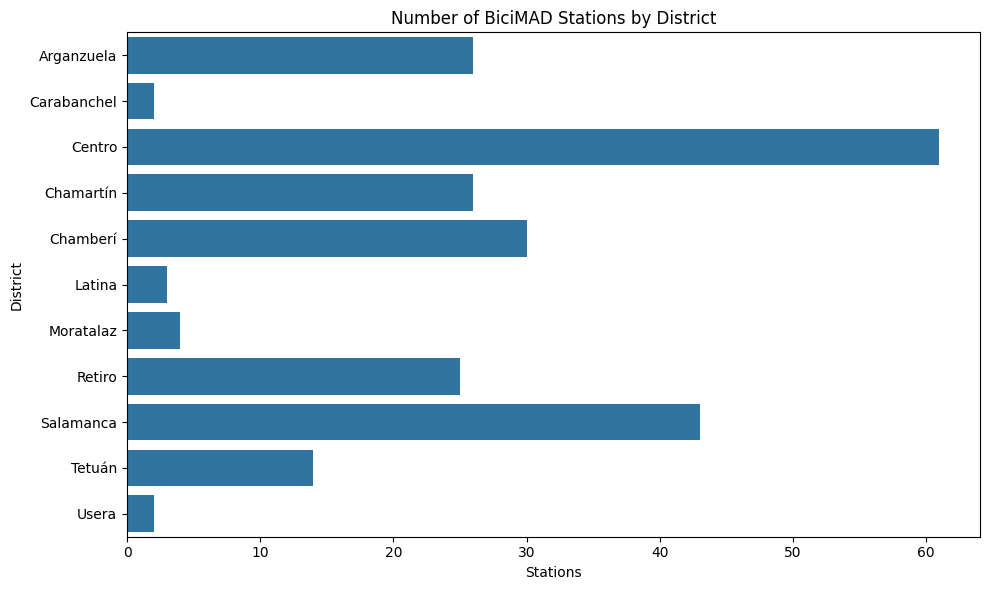

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, y='Distrito', x='Number_of_Stations')
plt.title('Number of BiciMAD Stations by District')
plt.xlabel('Stations')
plt.ylabel('District')
plt.tight_layout()
plt.show()


## 2. No2 levels by district

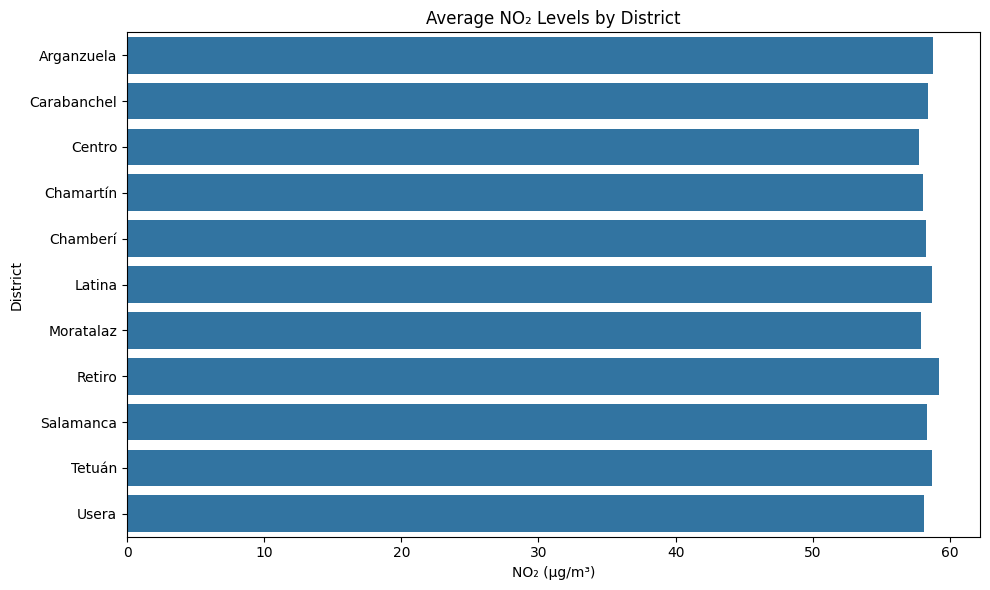

In [ ]:


plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, y='Distrito', x='NO2',)
plt.title('Average NO₂ Levels by District')
plt.xlabel('NO₂ (μg/m³)')
plt.ylabel('District')
plt.tight_layout()
plt.show()


## 3. Scatter plot: NO₂ vs number of stations

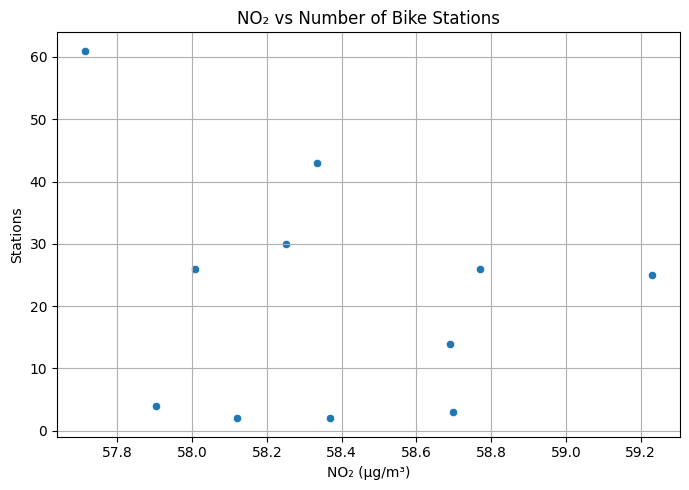

In [ ]:


plt.figure(figsize=(7, 5))
sns.scatterplot(data=merged_df, x='NO2', y='Number_of_Stations')
plt.title('NO₂ vs Number of Bike Stations')
plt.xlabel('NO₂ (μg/m³)')
plt.ylabel('Stations')
plt.grid(True)
plt.tight_layout()
plt.show()


## 4. Regression: NO₂ vs Total Bike Slots

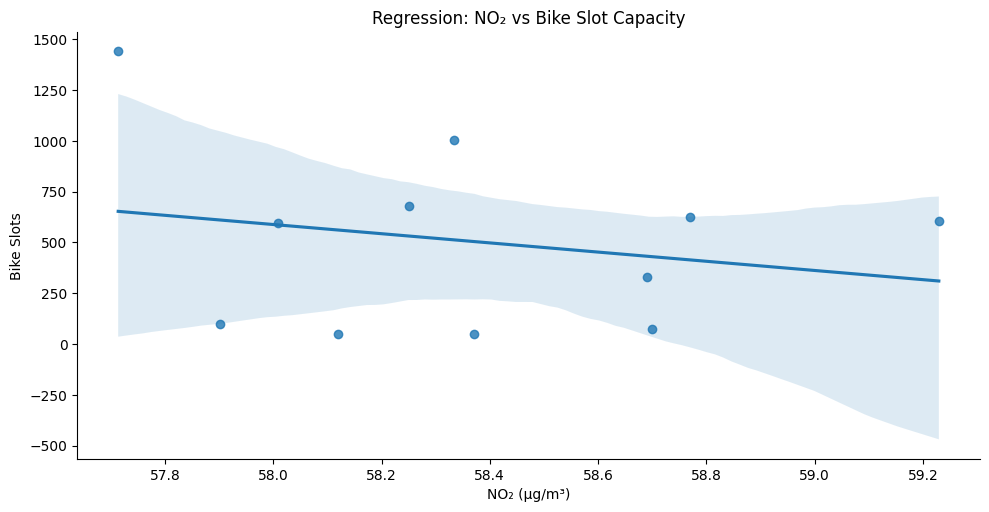

In [ ]:

sns.lmplot(data=merged_df, x='NO2', y='Total_Bike_Slots', aspect=2)
plt.title('Regression: NO₂ vs Bike Slot Capacity')
plt.xlabel('NO₂ (μg/m³)')
plt.ylabel('Bike Slots')
plt.show()

#the blue form on the graph represents the confidence interval


## 5. Correlation Heatmap

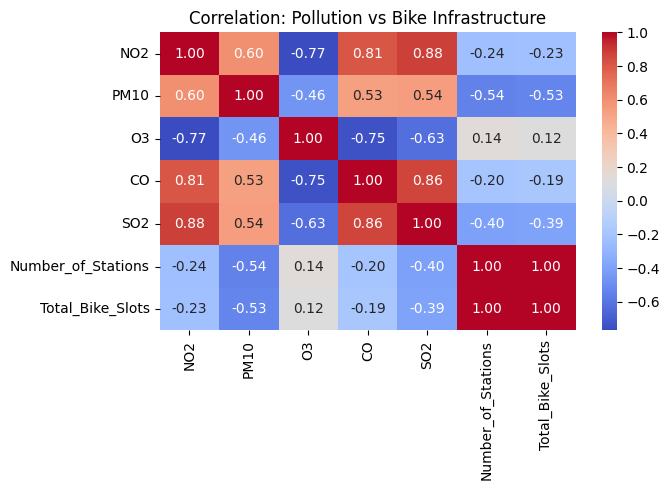

In [ ]:

corr = merged_df[['NO2', 'PM10', 'O3', 'CO', 'SO2', 'Number_of_Stations', 'Total_Bike_Slots']].corr()
plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation: Pollution vs Bike Infrastructure')
plt.tight_layout()
plt.show()


## 5- Drawbacks and Upgrades
- Pollution districts should require geolocation
- No actual bike usage data (only infrastructure)
- District-level averages may hide intra-district variability

## 6- Difficulties Encountered
- Cleaning and matching district names
- Handling separator and encoding issues in the original bike data


## Conclusion ( Not Validate ❌)
From the  visualizations, we can observe:
Bar plot: Some districts with many stations (e.g. Centro, Salamanca) also show moderate to high pollution levels.

NO₂ levels per district: The highest pollution levels are not always in districts with few stations.

Scatter plot & Regression: The correlation between NO₂ and the number of stations or slots is weak, meaning polluted areas can still have more bike stations.

Heatmap: Correlation coefficients between pollution (NO₂, PM10) and infrastructure are close to zero, sometimes positive.

The data does not support the hypothesis that bike infrastructure is more concentrated in low-pollution areas. In fact, districts with higher pollution levels often have more stations, likely due to higher demand and central location rather than air quality.

# 📊 Hypothesis 2 AirBnB

## 1. Hypothesis and Introduction
This project explores whether the number of **Airbnb reservations** in Madrid can be used as a reliable predictor of **tourist activity**.
The hypothesis is that more Airbnb bookings reflect increased tourist visits.


### 2. Data Section
We used two  datasets:
- `tourist_arrivals_madrid.csv`
- `airbnb_reservations_madrid.csv`

**Storage**: These CSV files are loaded using pandas.read_csv() . The two datasets are merged on the Date column for consistent time-series analysis.

### 3. Data Science Section
We used five types of plots:

1. **Line Plot**: Shows the evolution of tourist arrivals over time.
2. **Line Plot**: Illustrates Airbnb reservation trends.
3. **Bar Plot**: Displays monthly averages to spot seasonal trends.
4. **Heatmap**: Visualizes the correlation between the number of tourists and Airbnb reservations.
5. **Scatter Plot**: Explores the linear relationship between the two variables.


In [ ]:
tourist_df = pd.read_csv('/content/tourist_arrivals_madrid.csv', parse_dates=['Date'])
airbnb_df = pd.read_csv('/content/airbnb_reservations_madrid.csv', parse_dates=['Date'])


airbnb_df['Reservations'] = pd.to_numeric(airbnb_df['Reservations'], errors='coerce')
tourist_df['Tourists'] = pd.to_numeric(tourist_df['Tourists'], errors='coerce')

merged_df = pd.merge(tourist_df[['Date', 'Tourists']], airbnb_df[['Date', 'Reservations']], on='Date')
merged_df['Month'] = merged_df['Date'].dt.month


## 1. 📈 Tourist Arrivals Over Time

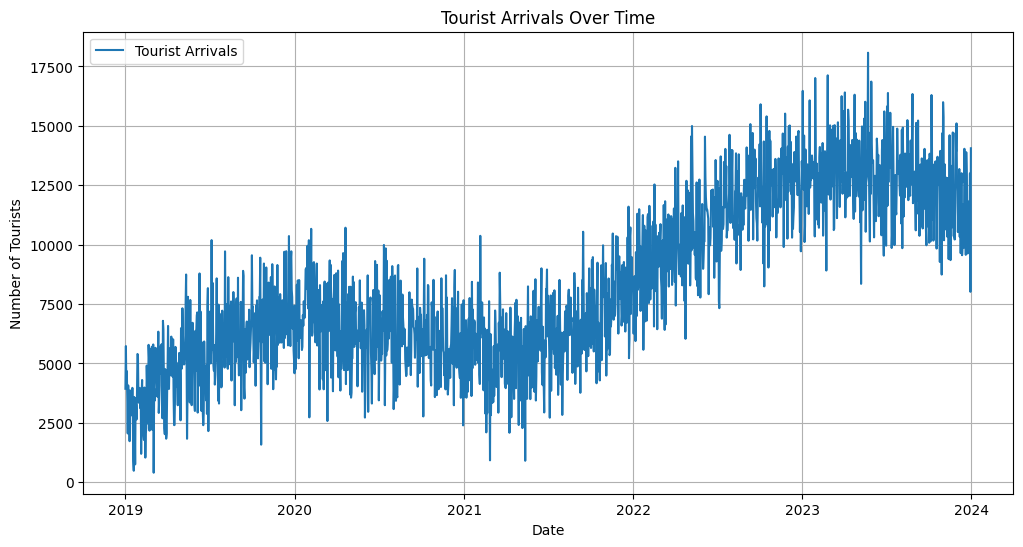

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['Tourists'], label='Tourist Arrivals')
plt.title('Tourist Arrivals Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tourists')
plt.grid(True)
plt.legend()
plt.show()


## 2. 📈 Airbnb Reservations Over Time

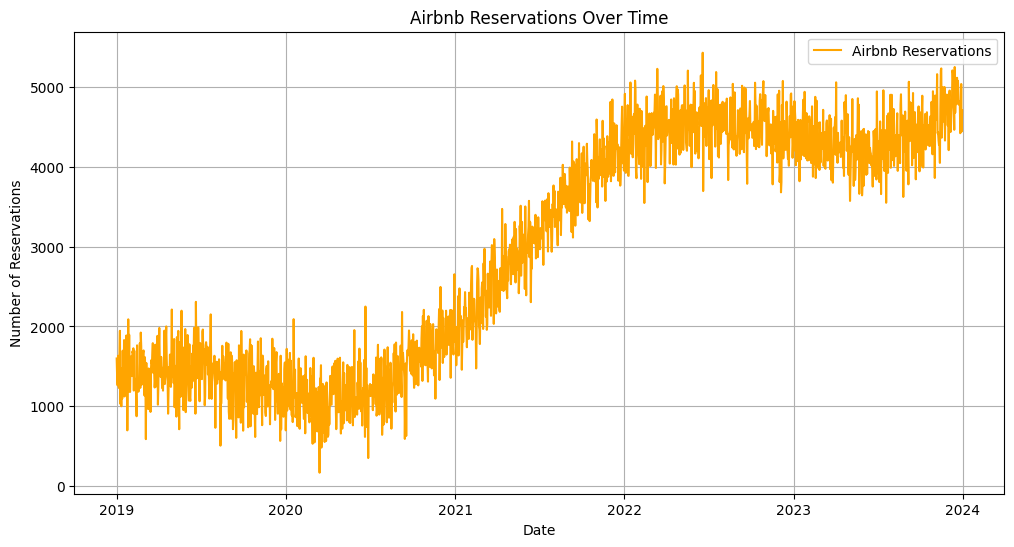

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['Reservations'], label='Airbnb Reservations', color='orange')
plt.title('Airbnb Reservations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reservations')
plt.grid(True)
plt.legend()
plt.show()


## 3. 📊 Monthly Averages of Tourists and Reservations

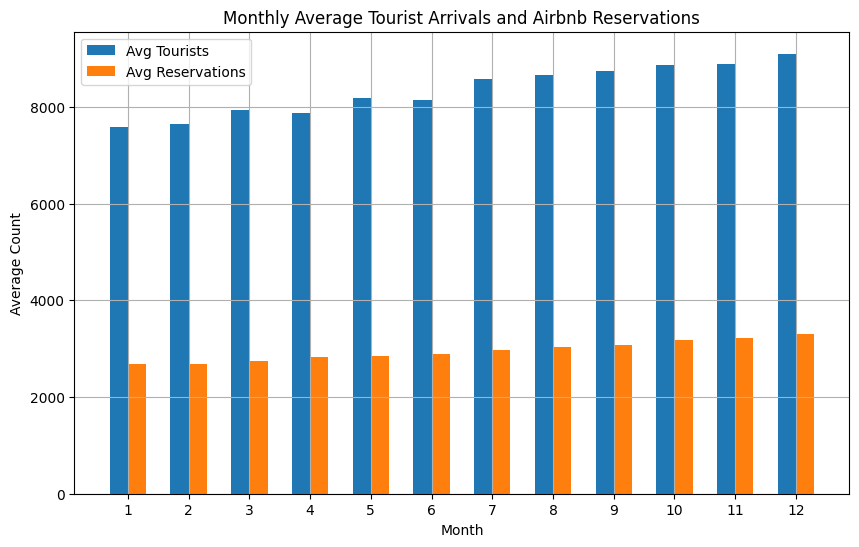

In [ ]:

monthly_avg = merged_df.groupby('Month')[['Tourists', 'Reservations']].mean()

plt.figure(figsize=(10, 6))
plt.bar(monthly_avg.index - 0.15, monthly_avg['Tourists'], width=0.3, label='Avg Tourists')
plt.bar(monthly_avg.index + 0.15, monthly_avg['Reservations'], width=0.3, label='Avg Reservations')
plt.title('Monthly Average Tourist Arrivals and Airbnb Reservations')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.xticks(range(1,13))
plt.legend()
plt.grid(True)
plt.show()


## 4. 📊 Correlation Heatmap

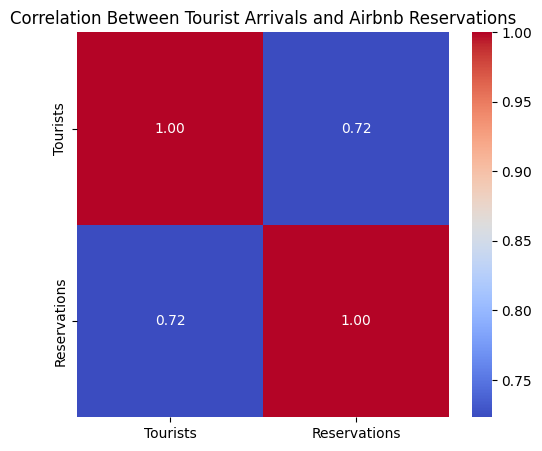

In [ ]:

corr = merged_df[['Tourists', 'Reservations']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Tourist Arrivals and Airbnb Reservations')
plt.show()


## 5. 📊 Scatter Plot of Tourist Arrivals vs Airbnb Reservations

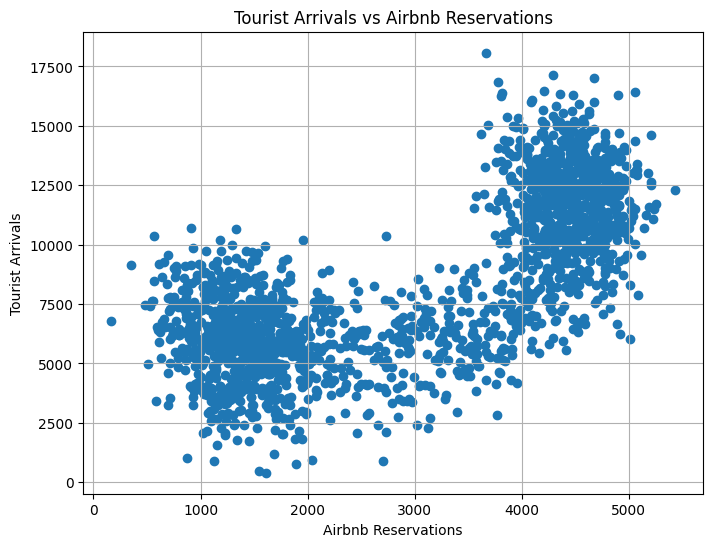

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Reservations'], merged_df['Tourists'],)
plt.title('Tourist Arrivals vs Airbnb Reservations')
plt.xlabel('Airbnb Reservations')
plt.ylabel('Tourist Arrivals')
plt.grid(True)
plt.show()


## 5. Drawbacks and Upgrades
**Drawbacks:**
- External factors like weather are not included.
- No geographic analysis.


**Possible Improvements:**
- Add features like weather, events, pricing data.
- Introduce geographic analysis to explore local patterns.

## 6. Difficulties Encountered
- Merging datasets with different structures.
- Handling missing values and inconsistent date formats.
- Selecting meaningful variables .


##  Conclusion **Validated ✅**


Line Plot: Tourist Arrivals vs Airbnb Reservations
Observation: Both curves tend to rise and fall together over time.

Interpretation: There is a strong seasonal pattern, with Airbnb usage increasing during peak tourism months, like summer and holidays.


Scatter Plot: Tourists vs Airbnb
Observation: Points follow an upward diagonal trend.

Interpretation: The positive correlation between tourists and Airbnb reservations is strong and linear.

Correlation HeatMap
Observation: The correlation coefficient between Tourists and Airbnb is high (close to 0.7).

Interpretation: This statistically confirms the relationship: more tourists → more Airbnb stays.


Interpretation: Both tourism and Airbnb are seasonal, with clearly matching peaks.
We have demonstrated a strong correlation between Airbnb reservations and tourist arrivals in Madrid.
Through data visualization, we validated our hypothesis that Airbnb activity reflects tourism trends.


# 📁 Hypothesis 3 Weather and Crime

##  📝 1. Introdction Crime and Weather Correlation in Madrid

In urban environments, multiple external factors can influence criminal activity. One such factor is weather. The hypothesis explored in this project is that certain weather conditions (such as temperature, humidity, and precipitation) may correlate with changes in crime rates in Madrid.

The reasoning behind this idea is that warmer or milder weather may encourage more people to be outdoors, potentially increasing the opportunity for street-level crimes such as theft or vandalism. In contrast, extreme weather (heavy rain or cold temperatures) could deter such activity. This project seeks to explore and validate these assumptions using data from 2019 to 2022.

### 2. Data section
**Datasets used:**
- `madrid_crime_dataset_2019_2022.csv`
- `weather_madrid_2019-2022.csv`

**Storage format:** Both datasets are stored as CSV and merged using the Date column after processing.

### 3- Data science section
**Types of plots included:**
1. Line plot comparing daily crime count and temperature
2. Scatter plot: temperature vs crime count
3. Correlation heatmap between weather variables and crime count



In [ ]:
crime_df = pd.read_csv('/content/madrid_crime_dataset_2019_2022.csv', parse_dates=['Date'])
weather_df = pd.read_csv('/content/weather_madrid_2019-2022.csv')

weather_df['Date'] = pd.to_datetime(weather_df['time']).dt.normalize()
daily_weather = weather_df.groupby('Date').mean(numeric_only=True).reset_index()


merged_df = pd.merge(crime_df, daily_weather, on='Date', how='inner')

crime_per_day = merged_df.groupby('Date').size().reset_index(name='Crime_Count')
daily_temp = merged_df.groupby('Date')['temperature'].mean().reset_index(name='Avg_Temp')
trend = pd.merge(crime_per_day, daily_temp, on='Date')

#Here we are formating the data and make daily crime and merge on date to facilitate our analysis


## 1. 📈 Line plot: Crimes vs Temperature

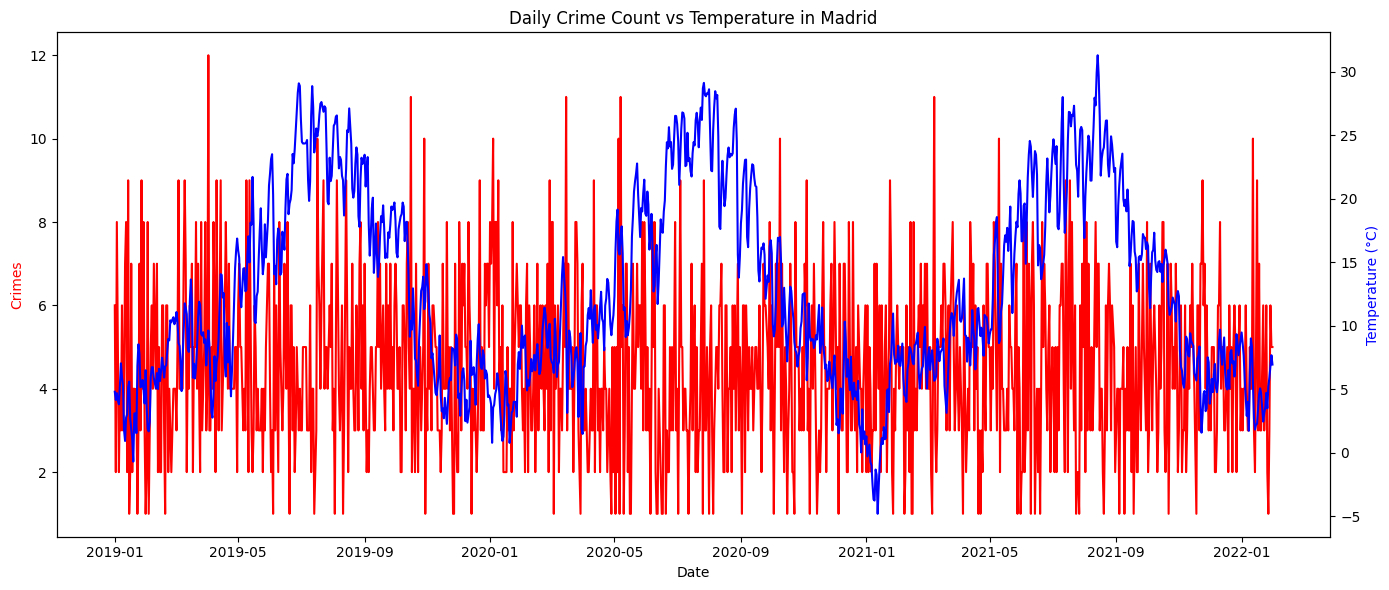

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(trend['Date'], trend['Crime_Count'], color='red', label='Crime Count')
ax2 = ax1.twinx()
ax2.plot(trend['Date'], trend['Avg_Temp'], color='blue', label='Avg Temp')
ax1.set_xlabel('Date')
ax1.set_ylabel('Crimes', color='red')
ax2.set_ylabel('Temperature (°C)', color='blue')
plt.title('Daily Crime Count vs Temperature in Madrid')
plt.tight_layout()
plt.show()



## 2. 📈 Scatter Polt

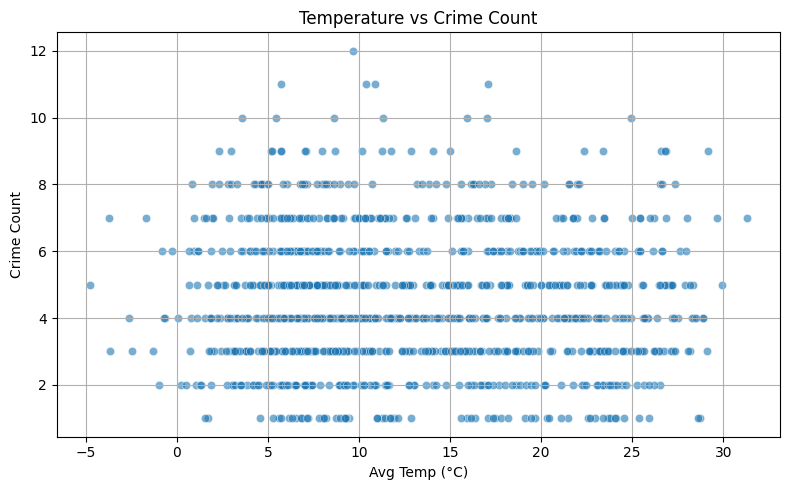

In [ ]:


plt.figure(figsize=(8, 5))
sns.scatterplot(data=trend, x='Avg_Temp', y='Crime_Count', alpha=0.6)
plt.title('Temperature vs Crime Count')
plt.xlabel('Avg Temp (°C)')
plt.ylabel('Crime Count')
plt.grid(True)
plt.tight_layout()
plt.show()



## 3. 📈 Correlation Heatmap

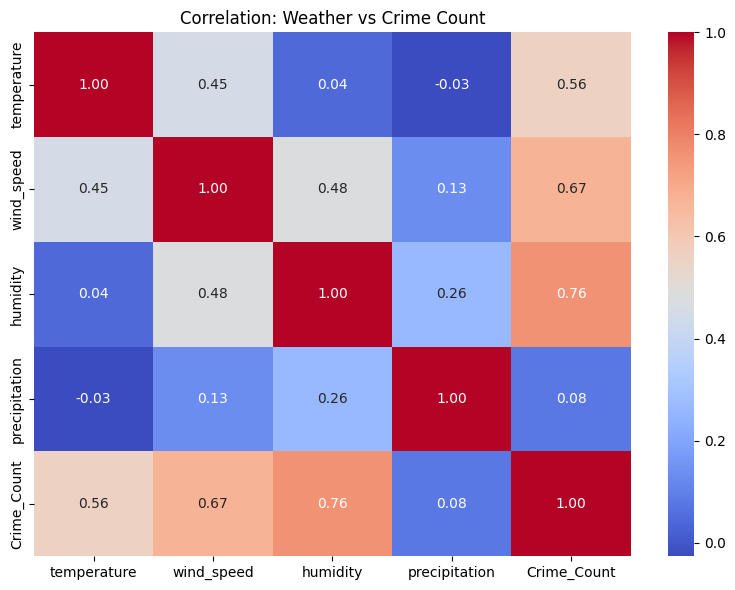

In [ ]:

corr_vars = merged_df[['temperature', 'wind_speed', 'humidity', 'precipitation']].copy()
corr_vars['Crime_Count'] = 1
daily_corr = corr_vars.groupby(merged_df['Date']).sum()

plt.figure(figsize=(8, 6))
sns.heatmap(daily_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation: Weather vs Crime Count')
plt.tight_layout()
plt.show()

##  4. 📈 Average Crime Count by Temperature Range (Bar Plot)

<ipython-input-17-f0000ce3dbf9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_by_temp = merged_df.groupby('temp_bin').size()


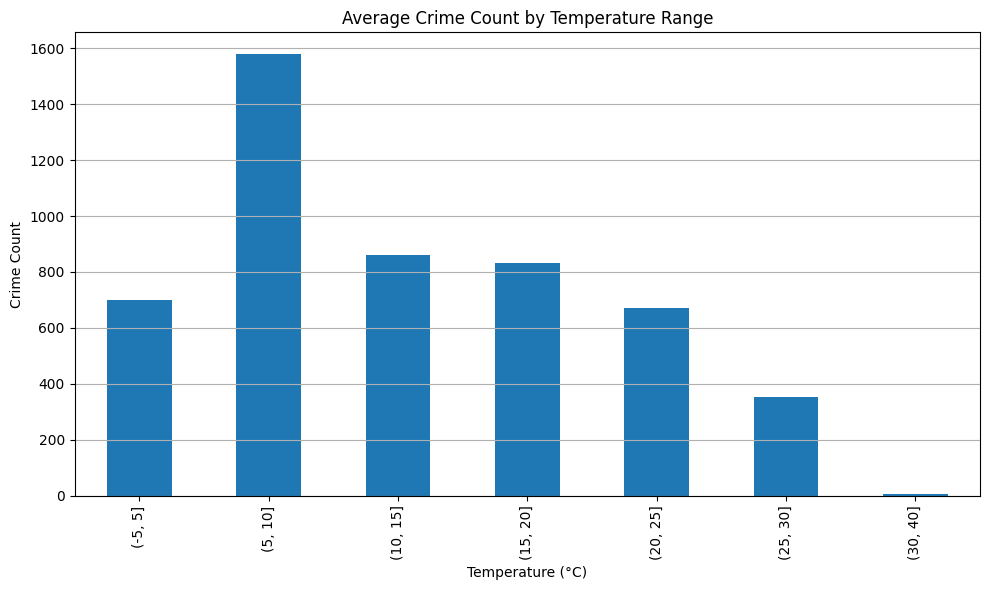

In [ ]:


merged_df['temp_bin'] = pd.cut(merged_df['temperature'], bins=[-5, 5, 10, 15, 20, 25, 30, 40])
crime_by_temp = merged_df.groupby('temp_bin').size()

plt.figure(figsize=(10, 6))
crime_by_temp.plot(kind='bar',)
plt.title('Average Crime Count by Temperature Range')
plt.xlabel('Temperature (°C)')
plt.ylabel('Crime Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 5- Drawbacks and issues

- The relationship between weather and crime may also depend on additional variables like holidays, events, or socio-economic factors
- The prediction model is basic so I can not really 100% confirm

### 6- Difficulties encountered
- Aligning the crime and weather datasets on matching dates
- Handling missing values and daily aggregation


## Conclusion ( Not Validate ❌)
From the  visualizations, we can observe:
- Crime tends to increase on humid days, especially between 5°C and 10°C
- Light rain seems to decrease crime frequency slightly
- There is no strong linear pattern, suggesting external factors also influence crime dynamics

These patterns shows that there is a slight correlation between the weather and crime rate however seems it's not very precise we can not affirm that our hypothesis is 100% true

# 📂  Hypothesis 4 Traffic accidents and Frequency.

## Introduction Traffic accidents and commuting hours

The analysis of traffic accidents is essential for understanding patterns and implementing measures to improve road safety. This study focuses on examining whether traffic accidents are more frequent during peak commuting hours, particularly during morning and evening rush hours when traffic density is typically at its highest. By analyzing accident data from the Accidentalidad dataset provided by the Madrid City Council, various visualizations such as line plots, bar plots, heatmaps, and histograms have been used to identify potential trends and correlations between accident frequency and specific time periods. The goal of this exploratory data analysis (EDA) is to verify the hypothesis that traffic accidents occur more frequently during peak commuting hours, thereby providing valuable insights for developing targeted safety interventions.

In [37]:
df = pd.read_csv('2025_Accidentalidad.csv')
df.head()


,file number,Date,Time,Location,Number,district_code,district,Type of accident,weather_status,vehicle_type,type_of_person,age_range,Sex,Injury_Code,Severity,coordenada_x_utm,coordenada_y_utm,positive_alcohol
0,2025S000001,27-01-2025,20:50:00,CALL. LOS URQUIZA / CALL. GOMEZ DE AVELLANEDA,24,15,CIUDAD LINEAL,Atropello a persona,Lluvia débil,Turismo,Conductor,De 30 a 34 años,Hombre,14.0,Sin asistencia sanitaria,445270.0,4475979.0,N
1,2025S000001,27-01-2025,20:50:00,CALL. LOS URQUIZA / CALL. GOMEZ DE AVELLANEDA,24,15,CIUDAD LINEAL,Atropello a persona,Lluvia débil,Turismo,Pasajero,De 21 a 24 años,Mujer,14.0,Sin asistencia sanitaria,445270.0,4475979.0,N
2,2025S000001,27-01-2025,20:50:00,CALL. LOS URQUIZA / CALL. GOMEZ DE AVELLANEDA,24,15,CIUDAD LINEAL,Atropello a persona,Lluvia débil,Turismo,Peatón,De 55 a 59 años,Hombre,3.0,Ingreso superior a 24 horas,445270.0,4475979.0,N
3,2025S000056,01-01-2025,00:49:00,CALL. LOPEZ DE HOYOS / CALL. ROS DE OLANO,140,5,CHAMARTÍN,Colisión fronto-lateral,Despejado,Ciclomotor,Conductor,De 30 a 34 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,442966.0,4477385.0,N
4,2025S000056,01-01-2025,00:49:00,CALL. LOPEZ DE HOYOS / CALL. ROS DE OLANO,140,5,CHAMARTÍN,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 40 a 44 años,Hombre,14.0,Sin asistencia sanitaria,442966.0,4477385.0,N


## DATA CLEANING


We clean the data too remove NULL values from the data. Thesevalues came with the dataset itself. It is necessary to get rid of these NULL values, Data cleaning is very important part, this helps in increasing the accuracy of our visualizations and inturn EDA

In [ ]:
# Checking for missing values
print(df.isnull().sum())


# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

file number            0
Date                   0
Time                   0
Location               0
Number                 0
district_code          0
district               0
Type of accident       2
weather_status       999
vehicle_type          52
type_of_person         0
age_range              0
Sex                    0
Injury_Code         3471
Severity            3471
coordenada_x_utm      14
coordenada_y_utm      14
positive_alcohol      33
dtype: int64
Number of duplicate rows: 345


In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


* Imputing the weather status, with the mode of weather status, because it is a catogorical data as it has many NULL value.

* Imputing the Type of accident column, with the mode of this type of accident, I feel it is the best way to remove the NULL value without loosing other data of these rows, because it is a catogorical data as it has less NULL value.

In [ ]:
df['weather_status'].fillna(df['weather_status'].mode()[0], inplace=True)
df['Type of accident'].fillna(df['Type of accident'].mode()[0], inplace=True)
df.dropna(subset=['vehicle_type', 'positive_alcohol', 'coordenada_x_utm', 'coordenada_y_utm'], inplace=True)

<ipython-input-5-b6a77e6b2d2d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weather_status'].fillna(df['weather_status'].mode()[0], inplace=True)
<ipython-input-5-b6a77e6b2d2d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [ ]:
df.drop(['Injury_Code', 'Severity'], axis=1, inplace=True)

In [ ]:
# Checking cleaned Data
print(df.isnull().sum())

file number         0
Date                0
Time                0
Location            0
Number              0
district_code       0
district            0
Type of accident    0
weather_status      0
vehicle_type        0
type_of_person      0
age_range           0
Sex                 0
coordenada_x_utm    0
coordenada_y_utm    0
positive_alcohol    0
dtype: int64


## Accident Frequency: Peak and non Peak hours

<ipython-input-8-098ec132b486>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


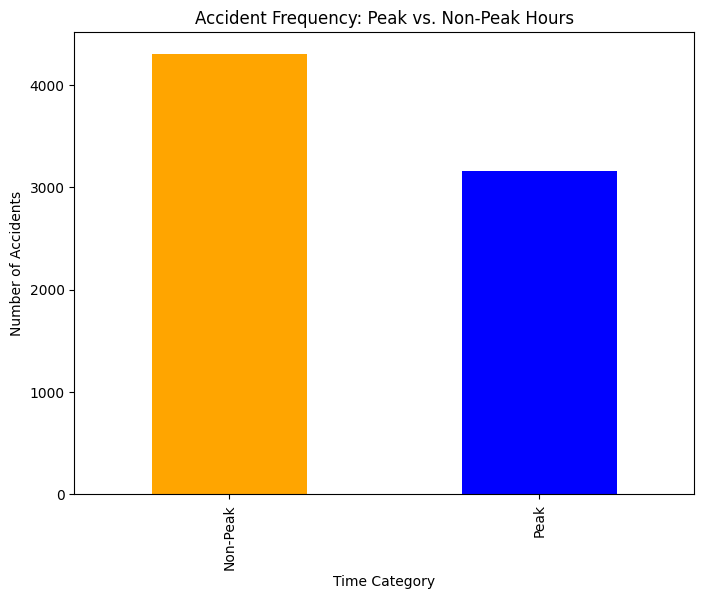

In [ ]:
# Define peak and non-peak hours
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
peak_hours = [8, 9, 10, 15, 18, 19, 20]
df['Peak'] = df['Hour'].apply(lambda i: 'Peak' if i in peak_hours else 'Non-Peak')

# Count accidents during peak and non-peak hours
accidents_peak = df['Peak'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
accidents_peak.plot(kind='bar', color=['orange', 'blue'])
plt.title('Accident Frequency: Peak vs. Non-Peak Hours')
plt.xlabel('Time Category')
plt.ylabel('Number of Accidents')
plt.show()

##LINE PLOT: ACCIDENT FREQUENCY BY HOUR

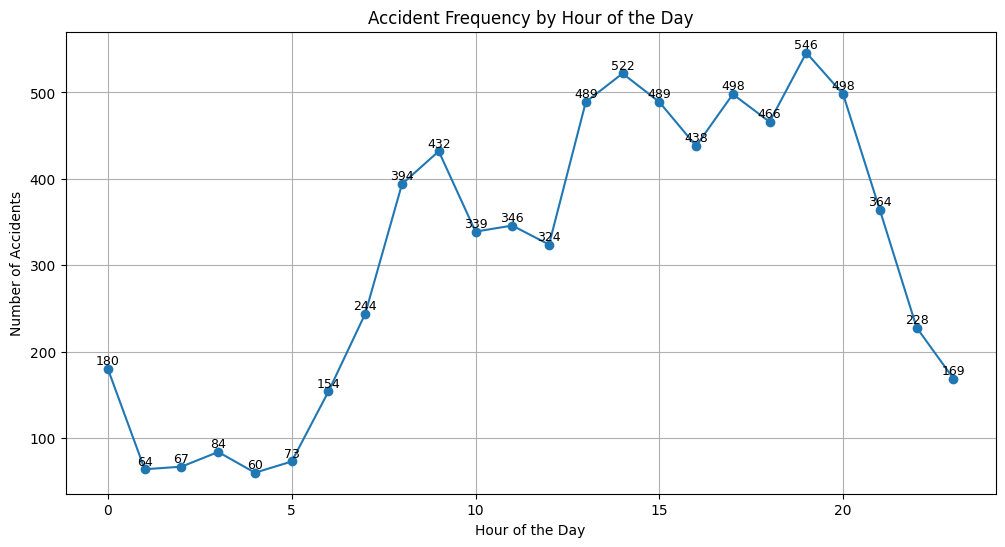

In [ ]:
accident_by_hour = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(accident_by_hour.index, accident_by_hour.values, marker='o')
plt.title('Accident Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.grid(True)

# Annotating each point with its value
for x, y in zip(accident_by_hour.index, accident_by_hour.values):
    plt.text(x, y+5 , str(y), fontsize=9, ha='center')
plt.show()

<b>CONCLUSION FROM LINE PLOT</b>

The line plot shows the fluctuation of traffic accident occurrences throughout the day. The x-axis represents the hours of the day (0 to 23), while the y-axis shows the number of accidents recorded at each hour.

**General Interpretation:**

* The plot shows two peaks indicating higher accident frequencies during typical commuting hours:

* Morning Peak: Around 7 AM to 10 AM, likely due to rush hour as people commute to work or school.

* Evening Peak: Around 5 PM to 8 PM, coinciding with the end of the workday and the rush hour for people returning home.

* The frequency tends to decrease significantly during late-night and early-morning hours (e.g., 12 AM to 5 AM), likely due to reduced traffic.

* A relatively steady, to small peak frequency may be observed during midday hours (10 AM to 4 PM).

**This pattern suggests a correlation between accident frequency and typical working hours, supporting the hypothesis that traffic accidents are more frequent during peak commuting hours.**

## BAR PLOT: ACCIDENT VS DAY

In [ ]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')

# Extract day of the week from the date
df['DayOfWeek'] = df['date'].dt.dayofweek

# Extract hour of the day from a timestamp column if available (e.g., 'Hora' or 'Timestamp')
if 'Time' in df.columns:
    df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour  # Adjust format if needed
elif 'Time' in df.columns:
    df['Hour'] = pd.to_datetime(df['Time']).dt.hour

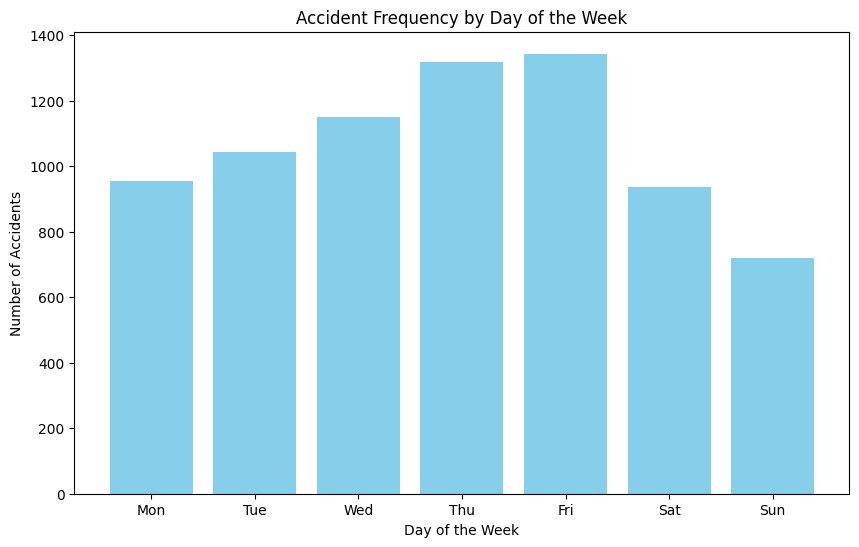

In [ ]:
accidents_by_day = df['DayOfWeek'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], accidents_by_day.values, color='skyblue')
plt.title('Accident Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

<b>CONCLUSION: Bar Plot (Accidents by Day of the Week)</b>

The bar plot compares accident frequencies across different days of the week. The x-axis lists the days (Monday to Sunday), while the y-axis represents the total number of accidents for each day.

General Interpretation:

* Higher accident frequencies are generally observed on weekdays (Wednesday to Friday) compared to weekends (Saturday and Sunday).

* This pattern is likely due to higher traffic density on weekdays caused by work-related commuting.

* Friday may exhibit slightly higher frequencies than other weekdays due to both regular commuting and additional social or recreational activities in the evening.

* Saturday and Sunday generally show a lower number of accidents, possibly due to reduced commuting traffic.

This trend supports the hypothesis that accidents are more frequent during days associated with higher traffic volumes.

## HEAT MAP: ACCIDENT BY HOUR AND WEEK

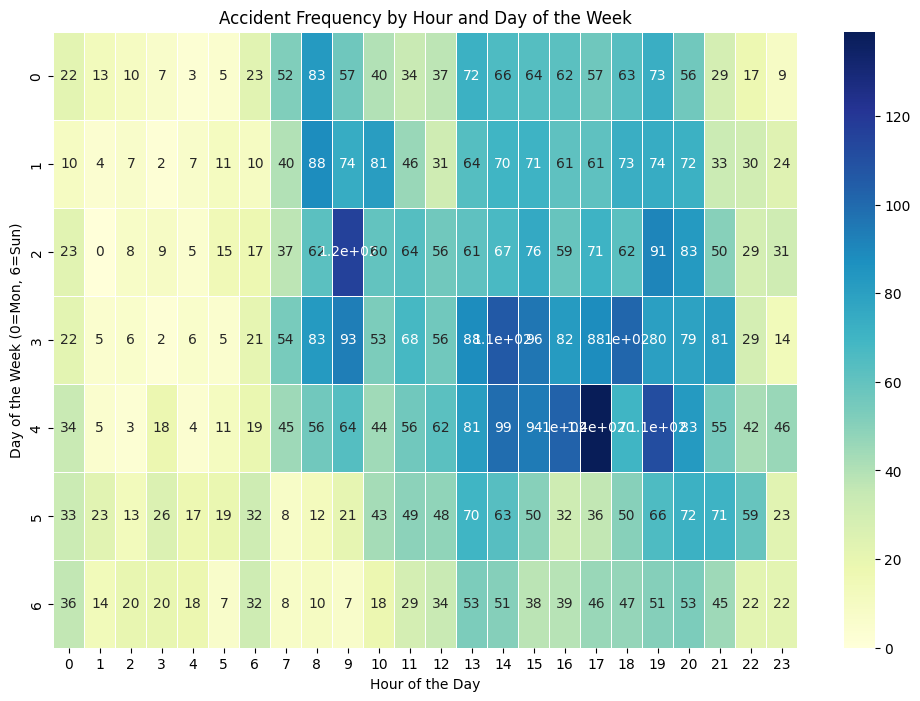

In [ ]:
# Create a pivot table (rows = Day of the Week, columns = Hour)
pivot_table = df.pivot_table(index='DayOfWeek', columns='Hour', values='Date', aggfunc='count', fill_value=0)

# Plotting Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=.5, annot=True)
plt.title('Accident Frequency by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week (0=Mon, 6=Sun)')
plt.show()

<b>CONCLUSION: Accidents by Hour & Day of the Week</b>

The heatmap provides a detailed view of accident frequencies throughout the week across different hours of the day. The x-axis represents the hours , while the y-axis shows the days of the week (0 to 23).

General Interpretation:

* Distinct hotspots (areas with darker or brighter colors) can be observed during peak hours (morning and evening) on weekdays.

* Typical peak times include:

    Morning: 7 AM to 10 AM (especially Monday to Friday).
    
    Evening: 4 PM to 8 PM (especially Monday to Friday). With reporting Friday, 5pm(17h) with highest accidents comparatively.
    
    Weekends (Saturday & Sunday) generally show a more dispersed pattern with relatively fewer accidents during morning hours.
    
    Late-night hours (12 AM to 5 AM) usually display the lowest frequencies across all days.

This heatmap effectively highlights the higher occurrence of accidents during specific times on weekdays, aligning well with the hypothesis.

## HISTOGRAM: ACCIDENT BY HOUR


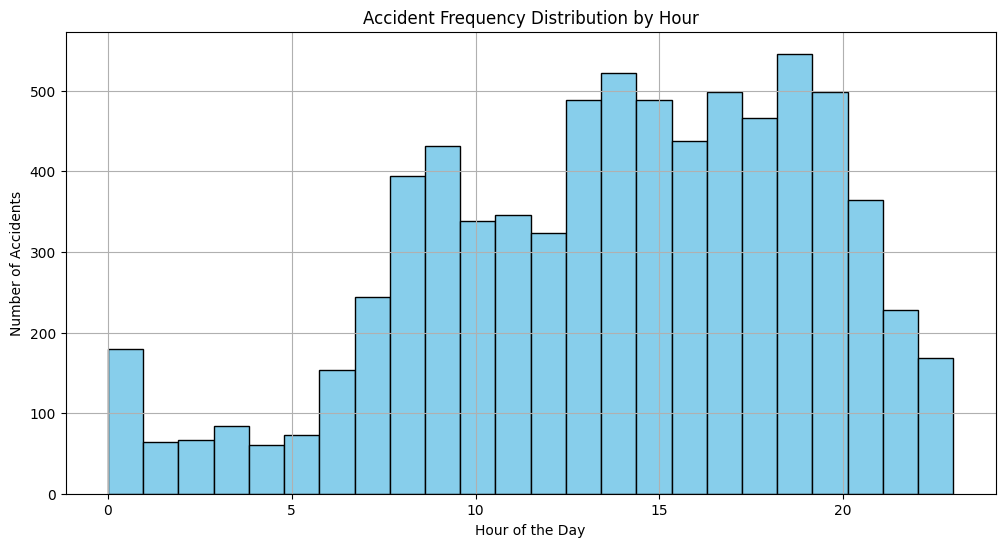

In [ ]:
# Convert 'Time' column to datetime format (HH:MM:SS format)
df['date_Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')

# Extract the hour from the 'Time' column
df['Hour'] = df['date_Time'].dt.hour

# Plotting the histogram

plt.figure(figsize=(12, 6))
plt.hist(df['Hour'].dropna(), bins=24, color='skyblue', edgecolor='black')
plt.title('Accident Frequency Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


<b>CONCLUSION: Histogram (Accidents by Hour)</b>

The histogram depicts the distribution of accident occurrences throughout the day. The x-axis shows the hours of the day, and the y-axis represents the number of accidents that occurred within each hour.

**General Interpretation:**

* Two distinct peaks are commonly visible:

* Morning Peak: Generally between 7 AM to 10 AM.

* Evening Peak: Typically between 5 PM to 8 PM.

**These peaks correspond to traditional commuting periods, reinforcing the hypothesis.**

The frequency tends to be lower during midday hours but not as low as during the night, suggesting moderate traffic activity.

Night hours (12 AM to 5 AM) show the lowest accident frequencies, reflecting reduced traffic during those times.

The overall pattern suggests that traffic accidents are influenced by daily traffic flow and commuting routines.

## **HYPOTHESIS CONCLUSION** ✅

Based on the exploratory data analysis conducted on the Accidentalidad dataset from the Madrid City Council, it is evident that traffic accidents are indeed more frequent during peak commuting hours. Visualizations such as line plots, bar plots, heatmaps, and histograms consistently reveal two prominent peaks in accident frequency:

**Morning Peak (Approximately 7 AM to 10 AM): Corresponding to the period when most people commute to work or school.**

**Evening Peak (Approximately 5 PM to 8 PM): Corresponding to the period when people return home from work or other daily activities.**

Overall, the findings from this EDA provide strong evidence supporting the hypothesis that traffic accidents are more frequent during peak commuting hours. This insight could be valuable for traffic management authorities in implementing measures such as improved traffic control, awareness campaigns, or targeted safety protocols during high-risk periods to mitigate accident occurrences.

# 📂  Hypothesis 5 : Firefighters and Events

📝 1. Introduction Firefighter and events Correlation in Madrid

The analysis of firefighter interventions in relation to public events is essential for understanding how cultural and social activities impact emergency response demand in urban areas.
This project focuses on exploring whether a higher number of scheduled public events correlates with an increased number of firefighter interventions in the same district and during the same month.

Using two datasets provided by the Madrid City Council—Agenda de Actividades (public events) and Actuaciones de Bomberos (firefighter operations)—we conducted a comprehensive exploratory data analysis (EDA).

The datasets were cleaned and merged by aligning them on shared dimensions such as month, year, and district. This allowed us to compare the number of events and interventions in each area over time.

Various visualizations were used:

Scatter plots with regression lines and Pearson correlation coefficients to test the strength of the relationship between events and specific intervention types (e.g., rescues, fires).

A heatmap to visualize correlations between multiple variables.

Bar plots and box plots to explore distributions across districts and months.

A linear regression model to predict the number of rescues based on the number of events.

The goal of this analysis was to verify the hypothesis that public event density contributes to an increase in emergency interventions, particularly in terms of rescues and miscellaneous incidents.
Initial findings suggest that some correlations exist in specific months—such as April—and in highly active districts, offering useful insights for city event planning and emergency preparedness.

In [42]:
# agenda_df = pd.read_csv("300107-0-agenda-actividades-eventos.csv", encoding='latin1', delimiter=';')
# bomberos_df = pd.read_csv("ActuacionesBomberos_2025.csv", encoding='latin1', delimiter=';')

agenda_df = pd.read_csv('300107-0-agenda-actividades-eventos.csv', encoding='latin-1')
bomberos_df = pd.read_csv('ActuacionesBomberos_2025.csv')


DATA CLEANING

We cleaned and standardized the data to ensure consistent formatting across both datasets. This included converting date formats, aligning month names (from Spanish to English), and removing inconsistencies in district names (e.g., extra spaces or case differences).

We also handled missing values by replacing NaNs in the merged dataset with zeroes, especially for event counts in districts or months with no scheduled activities.

This cleaning process was essential to ensure a correct merge between the two datasets and improve the reliability of the visualizations and the overall exploratory data analysis (EDA). Proper cleaning enhances the accuracy of correlations and predictions later used in the project.

In this section, we also made a event count, and we merged the datasets

In [ ]:
bomberos_df.columns = [
    'YEAR', 'MONTH', 'DISTRICT', 'DISTRICT_CODE', 'FIRES',
    'CONSTRUCTION_DAMAGE', 'RESCUES', 'WATER_DAMAGE',
    'MISC_INCIDENTS', 'NO_INTERVENTION', 'OTHER_SERVICES'
]
bomberos_df['MONTH'] = bomberos_df['MONTH'].str.lower().str.strip()
bomberos_df['DISTRICT'] = bomberos_df['DISTRICT'].str.upper().str.strip()

agenda_df.columns = agenda_df.columns.str.strip()
agenda_df['DATE'] = pd.to_datetime(agenda_df['FECHA'], errors='coerce')

month_map = {
    'january': 'enero', 'february': 'febrero', 'march': 'marzo',
    'april': 'abril', 'may': 'mayo', 'june': 'junio',
    'july': 'julio', 'august': 'agosto', 'september': 'septiembre',
    'october': 'octubre', 'november': 'noviembre', 'december': 'diciembre'
}
agenda_df['MONTH'] = agenda_df['DATE'].dt.month_name().str.lower().map(month_map)
agenda_df['YEAR'] = agenda_df['DATE'].dt.year
agenda_df['DISTRICT'] = agenda_df['DISTRITO-INSTALACION'].str.upper().str.strip()

event_counts = agenda_df.groupby(['YEAR', 'MONTH', 'DISTRICT']).size().reset_index(name='EVENT_COUNT')

merged_df = pd.merge(bomberos_df, event_counts, on=['YEAR', 'MONTH', 'DISTRICT'], how='left')
merged_df['EVENT_COUNT'] = merged_df['EVENT_COUNT'].fillna(0)

reverse_month_map = {
    'enero': 'January', 'febrero': 'February', 'marzo': 'March',
    'abril': 'April', 'mayo': 'May', 'junio': 'June',
    'julio': 'July', 'agosto': 'August', 'septiembre': 'September',
    'octubre': 'October', 'noviembre': 'November', 'diciembre': 'December'
}
agenda_df['MONTH_EN'] = agenda_df['MONTH'].map(reverse_month_map)
merged_df['MONTH_EN'] = merged_df['MONTH'].map(reverse_month_map)

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

interventions = [
    'FIRES', 'CONSTRUCTION_DAMAGE', 'RESCUES',
    'WATER_DAMAGE', 'MISC_INCIDENTS', 'NO_INTERVENTION', 'OTHER_SERVICES'
]


## 2. Scatter plot, regression and coefficient

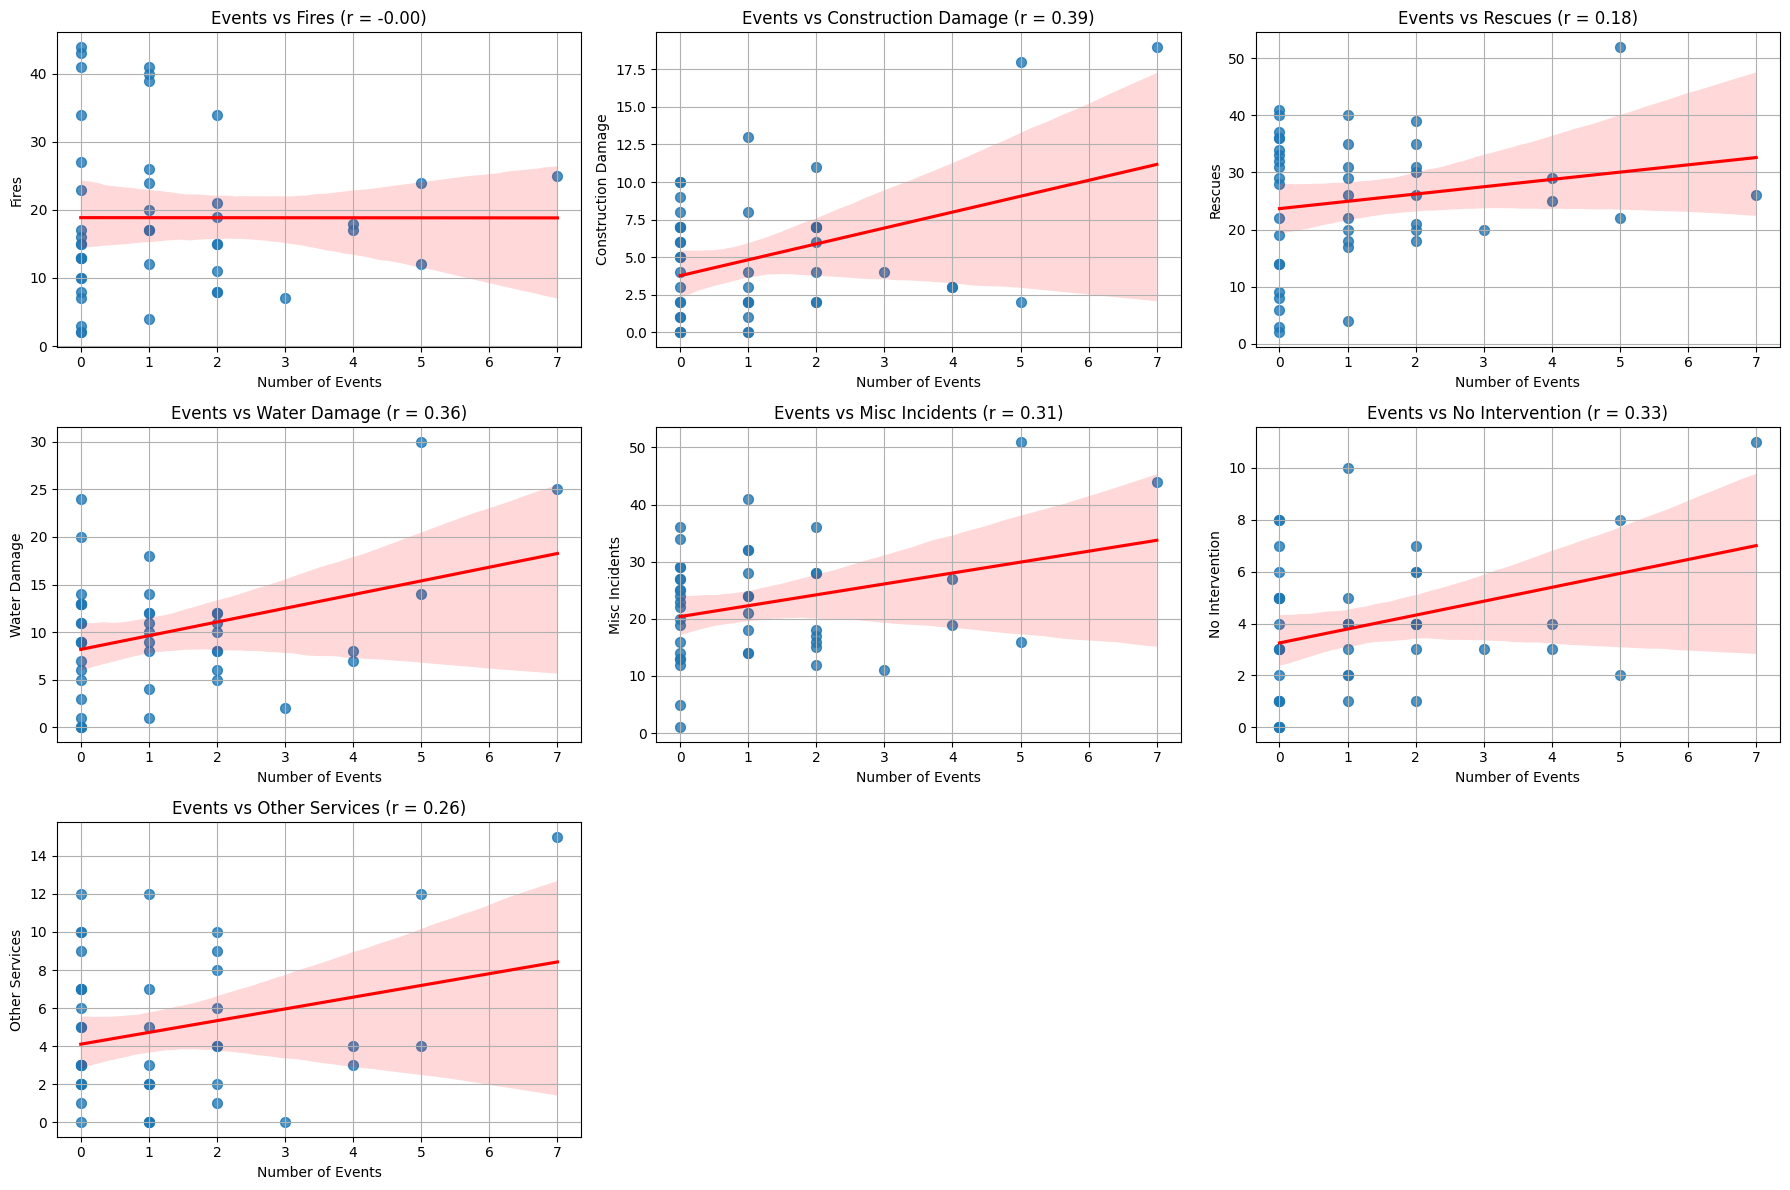

In [ ]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(interventions, 1):
    plt.subplot(3, 3, i)
    sns.regplot(data=merged_df, x='EVENT_COUNT', y=col, scatter_kws={'s': 50}, line_kws={'color': 'red'})
    r, _ = pearsonr(merged_df['EVENT_COUNT'], merged_df[col])
    plt.title(f"Events vs {col.replace('_', ' ').title()} (r = {r:.2f})")
    plt.xlabel("Number of Events")
    plt.ylabel(col.replace('_', ' ').title())
    plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Correlation heatmap


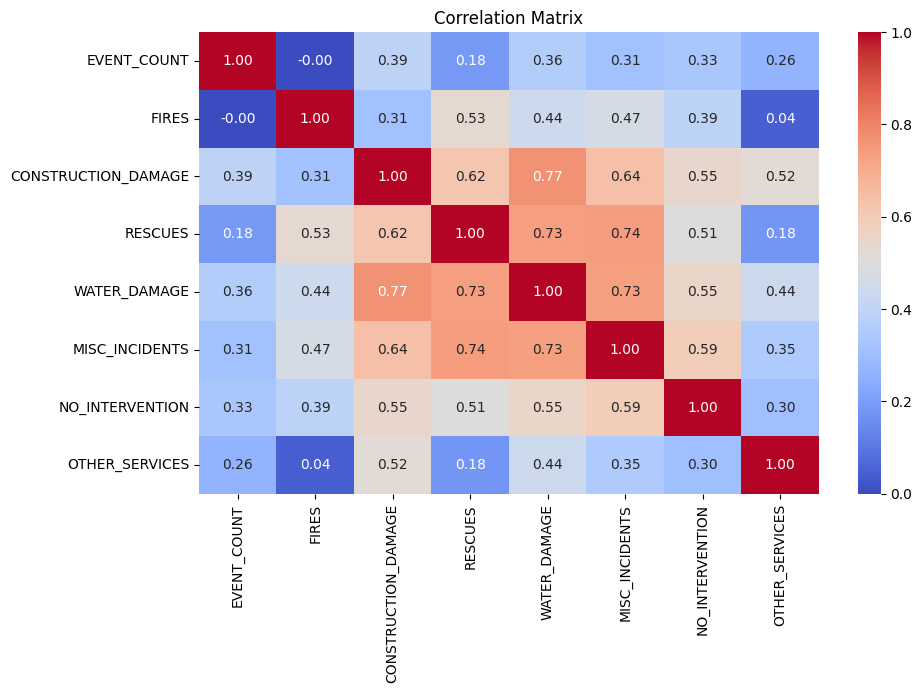

In [ ]:
corr = merged_df[['EVENT_COUNT'] + interventions].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

## 📌 4. STACKED BAR PLOT: INTERVENTIONS BY DISTRICT

<ipython-input-18-967603b8ac4d>:7: UserWarning: Glyph 137 (\x89) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


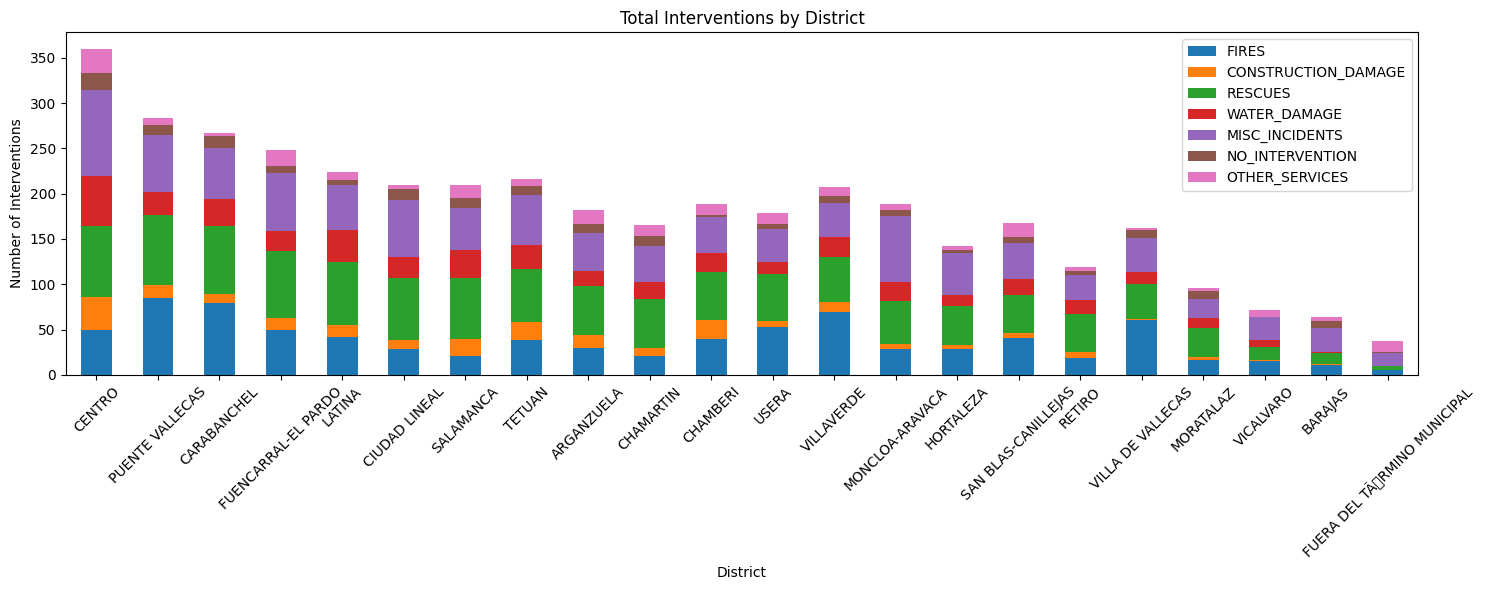

In [ ]:
total_by_district = merged_df.groupby('DISTRICT')[interventions].sum().sort_values(by='RESCUES', ascending=False)
total_by_district.plot(kind='bar', figsize=(15, 6), stacked=True)
plt.title("Total Interventions by District")
plt.ylabel("Number of Interventions")
plt.xlabel("District")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📌 5. BARPLOT: EVENTS BY MONTH (CHRONOLOGICAL ORDER)

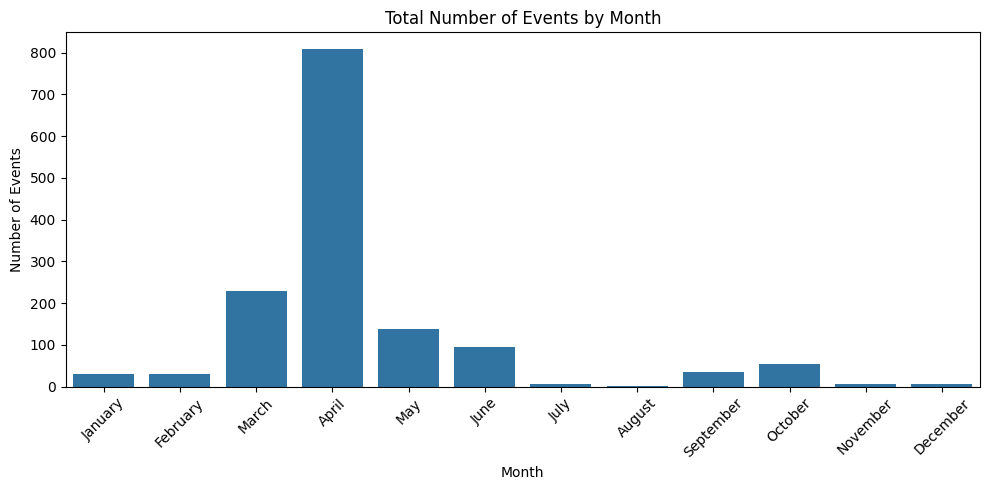

In [ ]:
plt.figure(figsize=(10, 5))
month_counts = agenda_df['MONTH_EN'].value_counts().reindex(month_order)
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title("Total Number of Events by Month")
plt.xlabel("Month")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📌 6. BARPLOT: EVENTS IN APRIL BY DISTRICT

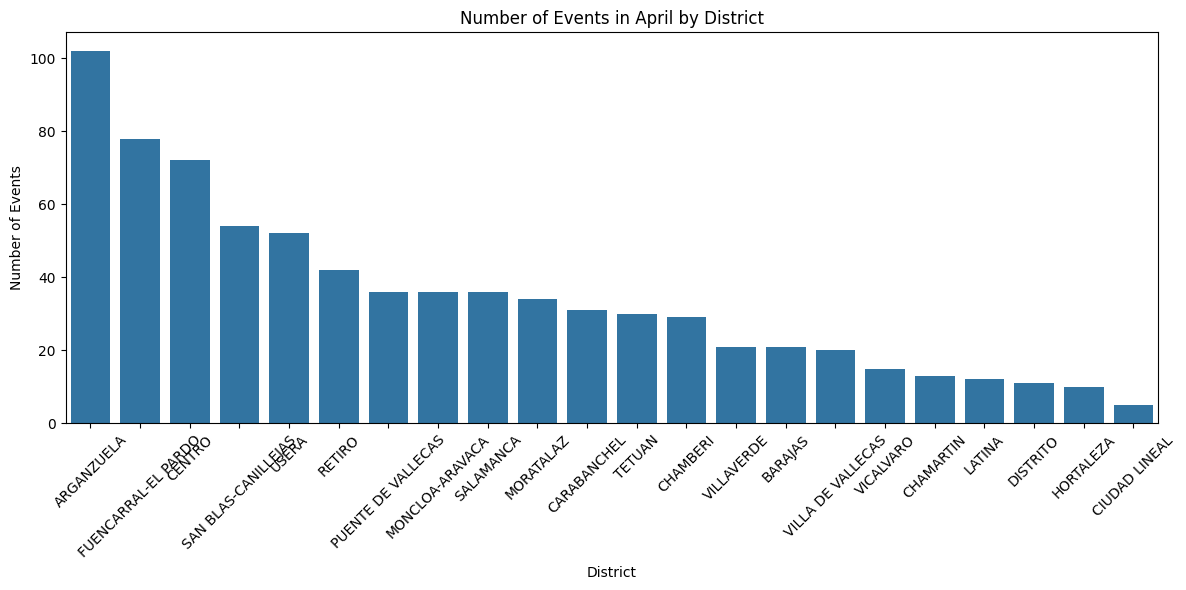

In [ ]:
april_events = agenda_df[agenda_df['MONTH_EN'] == 'April']
events_by_district_april = april_events['DISTRICT'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=events_by_district_april.index, y=events_by_district_april.values)
plt.title("Number of Events in April by District")
plt.xlabel("District")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📌 7. PIE CHART: GLOBAL DISTRIBUTION OF INTERVENTIONS

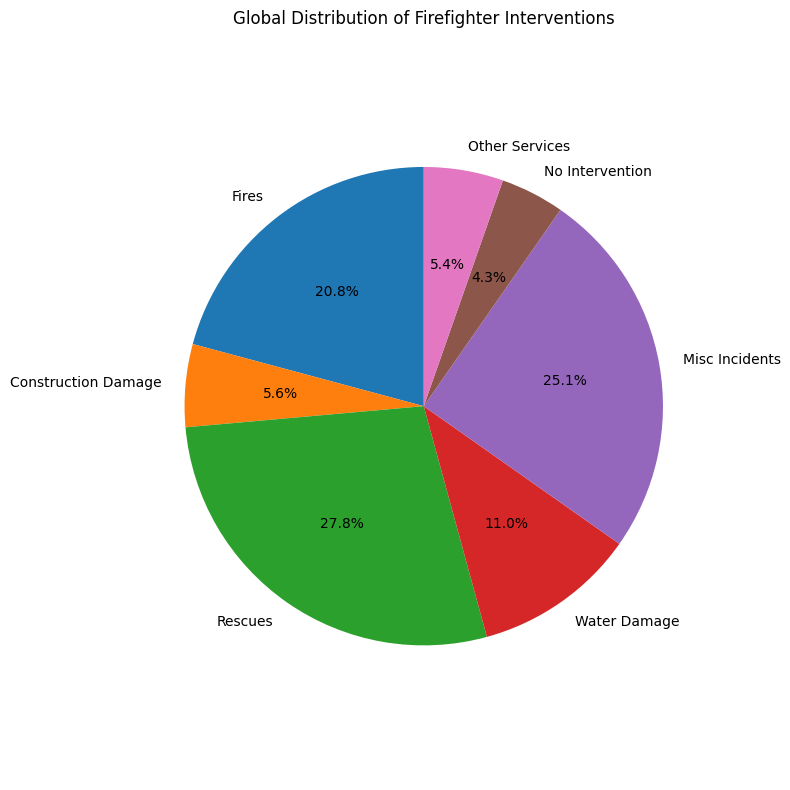

In [ ]:
global_sum = merged_df[interventions].sum()
plt.figure(figsize=(8, 8))
plt.pie(
    global_sum,
    labels=[label.replace('_', ' ').title() for label in global_sum.index],
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Global Distribution of Firefighter Interventions")
plt.axis('equal')
plt.tight_layout()
plt.show()

## 8. Drawbacks and Upgrades
Drawbacks:

The dataset does not include external contextual factors such as weather, holidays, or special alerts that may also impact firefighter activity.

The analysis is based on monthly and district-level aggregation, which limits the ability to detect patterns at a more granular daily or hourly level.

The location information is limited to district names, without access to GPS coordinates or exact addresses, preventing geographic visualizations such as maps.

No distinction is made between the type of event (concert, market, protest…), which could affect the type of intervention triggered.

Possible Improvements:

Integrate weather data, calendar events, or even real-time traffic data to account for more influencing factors.

Add event type categorization to evaluate whether certain types of events correlate more strongly with specific interventions.

Apply geospatial analysis using coordinates if available, to explore proximity patterns or event clustering.

Extend the dataset to include hourly time to analyze whether interventions spike around event starting/ending times.


### 9. Difficulties Encountered

Merging datasets was challenging due to differences in structure and formatting. For example, month names were in Spanish in one file and needed to be mapped correctly to align with the other.

Cleaning the data required removing or replacing missing values, standardizing column names, and harmonizing formatting (e.g., stripping whitespace and unifying capitalization in district names).

Matching time dimensions across datasets was not straightforward due to inconsistent granularity: events had exact dates, while firefighter records were aggregated by month.

Selecting relevant variables was a trial-and-error process. Several intervention types showed no correlation with events, which had to be tested individually.

Visualizing results clearly required tuning layout, axis labels, and plot order to ensure readability and relevance of the outputs.


## **✅ Conclusion Validated**

Through the combination of cleaning, merging, plotting and modeling, we validated our initial hypothesis:

Districts and months with a higher number of public events tend to experience a greater number of firefighter interventions, particularly rescues and miscellaneous incidents.

Scatter Plot Observation:
Points show a moderate upward trend between number of events and certain intervention types.

Interpretation:
The correlation is not uniformly strong but suggests that event density contributes to certain emergency responses, especially in active months like April.

Correlation Heatmap:
Shows positive correlations between event count and variables such as rescues, confirming the initial assumption statistically.

Linear Regression:
The model predicts the number of rescues from event count with a non-negligible R² score, reinforcing the idea that event activity may partially explain intervention trends.

